In [1]:
# download a demo picture
url = 'https://raw.githubusercontent.com/sh7ven/advait-demos/refs/heads/main/image-seg/demo.png'

from urllib.request import urlretrieve
urlretrieve(url, "demo.png")

('demo.png', <http.client.HTTPMessage at 0x7d049d2d8910>)

In [2]:
ls -al

total 1520
drwxr-xr-x 2 root root    4096 Mar 30 15:53 ./
drwxr-xr-x 8 root root    4096 Mar 30 15:53 ../
-rw-r--r-- 1 root root 1536186 Mar 30 15:53 demo.png
---------- 1 root root    5595 Mar 30 15:53 __notebook__.ipynb


In [3]:
!ls

demo.png  __notebook__.ipynb


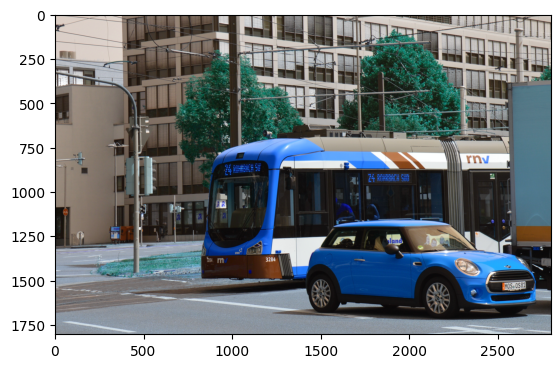

In [4]:
import cv2
from matplotlib import pyplot as plt

# read the image
img = cv2.imread("demo.png")

# plot the image for demonstration
# plt.figure(figsize=(20,20))

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)

In [5]:
from torchvision.models import detection

# load the model
model = detection.maskrcnn_resnet50_fpn(pretrained=True)

# set model in evaluation mode
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 156MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [6]:
from torchvision import transforms

# transform input to Tensor
transform = transforms.Compose([
    transforms.ToPILImage(), transforms.ToTensor()
])

model_input = transform(img)

outputs = model([model_input])

In [7]:
import numpy as np

for output in outputs:
    # for every output
    for mask, box, score in zip(
            output['masks'].detach().numpy(), 
            output['boxes'].detach().numpy(),
            output['scores'].detach().numpy()
    ):
        # if score > 0.5:
        img[(mask > 0.5).squeeze(), :] = np.random.uniform(0, 255, size=3)

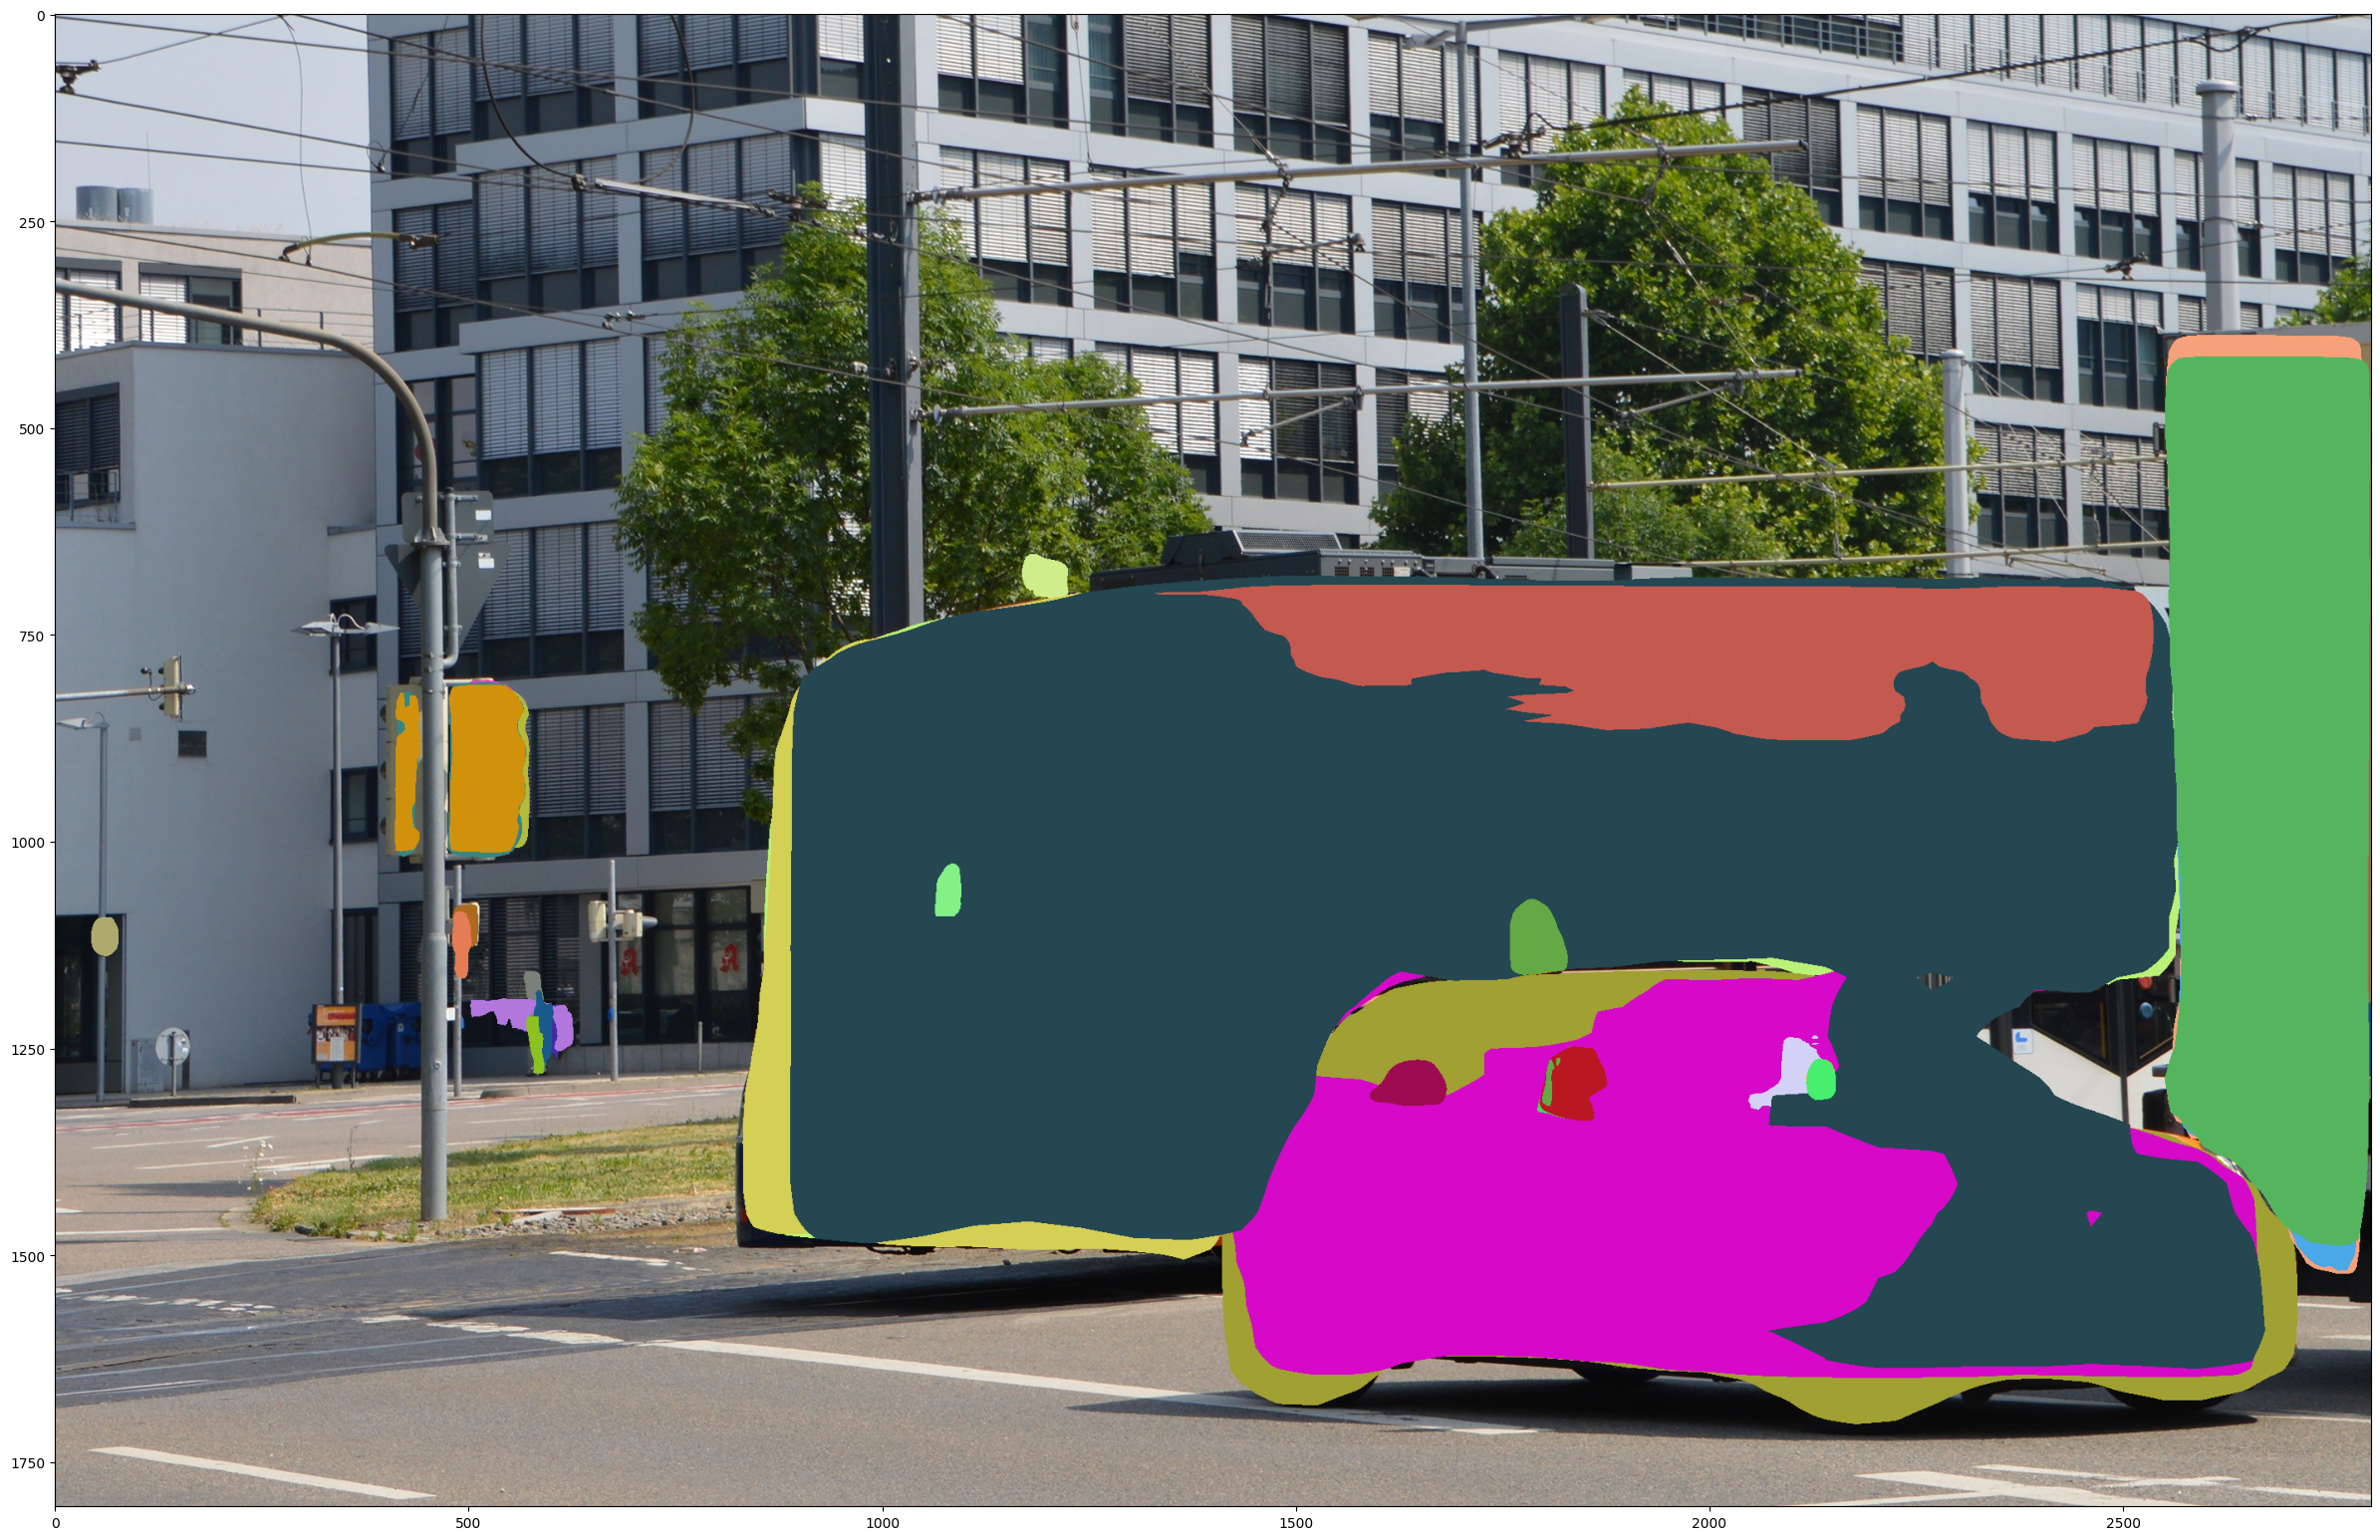

In [8]:
plt.figure(figsize=(30,30))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))